In [1]:
import os
import keras
from keras import layers
from keras import models
from encode import DataSet
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint
from keras.layers.convolutional import Conv2D, MaxPooling2D, SeparableConv2D

img_path = '/Users/seino/Documents/40_research/80_DeepLearning/playground/00_img/one'
height, width, channels = 32, 32, 3
num_classes = 32

ds = DataSet(img_path)
b = ds.make_digit()
c = ds.k_hot_encode()
x_train, x_test, y_train, y_test = ds.like_mnist(b,c, 0.2)

Using TensorFlow backend.


In [2]:
model = models.Sequential()
model.add(layers.SeparableConv2D(32, 3, activation='relu', input_shape=(height, width, channels)))
model.add(layers.SeparableConv2D(64, 3, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.MaxPooling2D(2))

model.add(layers.SeparableConv2D(64, 3, activation='relu'))
model.add(layers.SeparableConv2D(128, 3, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.MaxPooling2D(2))

model.add(layers.SeparableConv2D(64, 3, activation='relu'))
model.add(layers.SeparableConv2D(128, 3, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.GlobalAveragePooling2D())

model.add(layers.Dense(500, activation='relu'))
model.add(layers.Dense(num_classes, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['acc'])
model.summary()

W0808 12:55:45.256132 4394083776 deprecation_wrapper.py:119] From /Users/seino/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:131: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0808 12:55:45.262345 4394083776 deprecation.py:506] From /Users/seino/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0808 12:55:45.492988 4394083776 deprecation.py:323] From /Users/seino/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast r

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_1 (Separabl (None, 30, 30, 32)        155       
_________________________________________________________________
separable_conv2d_2 (Separabl (None, 28, 28, 64)        2400      
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
separable_conv2d_3 (Separabl (None, 12, 12, 64)        4736      
_________________________________________________________________
separable_conv2d_4 (Separabl (None, 10, 10, 128)       8896      
_________________________________________________________________
dropout_2 (Dropout)          (None, 10, 10, 128)       0         
__________

In [3]:
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor='val_acc',
        patience=1
    ),
    keras.callbacks.ModelCheckpoint(
        filepath='callbacks.h5',
        monitor='val_acc',
        save_best_only=True,
    ),
    keras.callbacks.TensorBoard(
        log_dir='./log',
        histogram_freq=1,
        batch_size=32,
        write_graph=True,
        write_grads=False,
        embeddings_freq=1,
        embeddings_layer_names=None,
        embeddings_metadata=None
    )
]

In [5]:
history = model.fit(x_train, y_train, batch_size=50, epochs=10, validation_data = (x_test, y_test), verbose=1)

Train on 10892 samples, validate on 2724 samples
Epoch 1/10
10892/10892 [==============================] - 15s 1ms/step - loss: 0.5433 - acc: 0.7647 - val_loss: 0.5289 - val_acc: 0.7670
Epoch 2/10
10892/10892 [==============================] - 14s 1ms/step - loss: 0.4532 - acc: 0.7666 - val_loss: 0.3898 - val_acc: 0.7689
Epoch 3/10
10892/10892 [==============================] - 14s 1ms/step - loss: 0.3571 - acc: 0.7765 - val_loss: 0.3334 - val_acc: 0.7883
Epoch 4/10
10892/10892 [==============================] - 14s 1ms/step - loss: 0.3284 - acc: 0.7922 - val_loss: 0.3193 - val_acc: 0.8055
Epoch 5/10
10892/10892 [==============================] - 14s 1ms/step - loss: 0.3051 - acc: 0.8092 - val_loss: 0.2910 - val_acc: 0.8251
Epoch 6/10
10892/10892 [==============================] - 14s 1ms/step - loss: 0.2808 - acc: 0.8311 - val_loss: 0.2650 - val_acc: 0.8494
Epoch 7/10
10892/10892 [==============================] - 15s 1ms/step - loss: 0.2594 - acc: 0.8515 - val_loss: 0.2436 - val_acc:

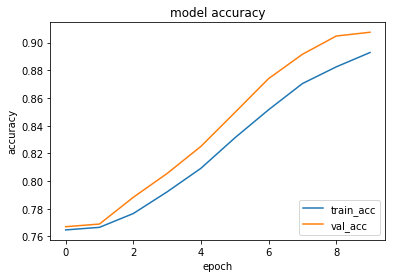

In [6]:
model.save('teeth_recognition.h5')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train_acc', 'val_acc'], loc='lower right')
plt.show()

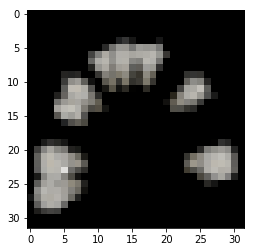

In [9]:
plt.imshow(x_train[0])

In [13]:
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(x_train)
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(10892, 30, 30, 32)


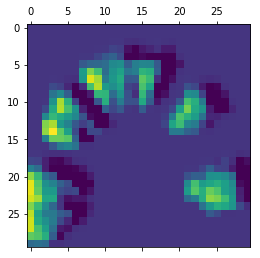

In [14]:
plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
plt.show()

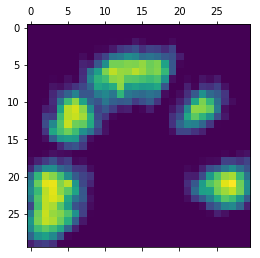

In [15]:
plt.matshow(first_layer_activation[0, :, :, 30], cmap='viridis')
plt.show()

/Users/seino/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


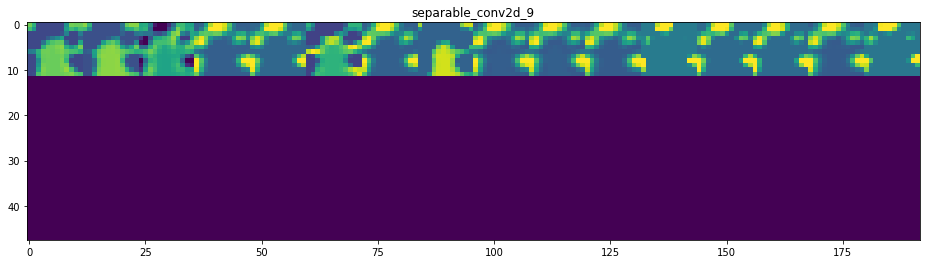

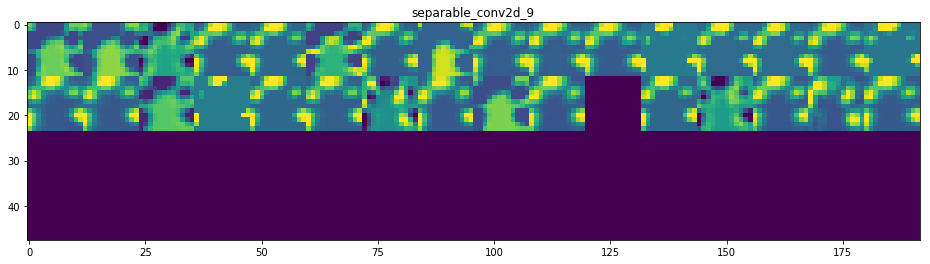

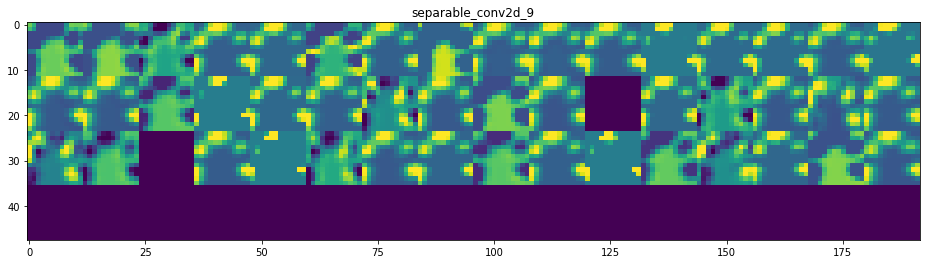

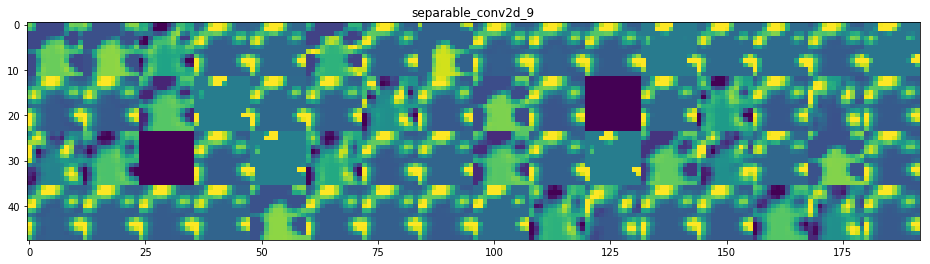

In [19]:
# 各レイヤーの名前を抽出
layer_names = []
for layer in model.layers[:4]:
    layer_names.append(layer.name)

# 一行に表示する画像の数
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    # レイヤーの特徴マップ数を取得
    n_features = layer_activation.shape[-1]
    # 特徴マップのサイズを取得
    size = layer_activation.shape[1]
    # 画像の行数を計算し画像を並べる0行列を生成
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            # 特徴マップを標準化
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            # 平均128、標準偏差64に変換
            channel_image *= 64
            channel_image += 128
            # 0-255に符号なし8ビット整数化
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            # 所定の位置にイメージを埋め込む
            display_grid[col * size : (col + 1) * size, row * size: (row +1) * size ] = channel_image
        # 画像の表示
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

plt.show()

In [49]:
from keras.applications.vgg16 import VGG16

model_p = VGG16(weights='imagenet')

from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions

sample_path ='/Users/seino/Documents/res/09_DeepLearning/img/With_Gingiva/Mix/512/11,12,13,14,15,16,17,21,22,23,24,25,26,27.png'
sample = image.load_img(sample_path, target_size=(224, 224))
c = image.img_to_array(sample)
c = np.expand_dims(c, axis=0)
c = preprocess_input(c)

preds = model_p.predict(c)
print('Predicted:', decode_predictions(preds, top=3)[0])
np.argmax(preds[0])

40960/35363 [==================================] - 0s 0us/step
Predicted: [('n03724870', 'mask', 0.10851144), ('n04192698', 'shield', 0.09592078), ('n09229709', 'bubble', 0.058599252)]


[[0.46839508 0.23341402 0.29360494 0.30989447 0.34094566 0.37507743
  0.42893258 0.4573071  0.3217565  0.27008897 0.3035181  0.3403744
  0.27154252 0.34462595]
 [0.27542078 0.08404697 0.12013346 0.22798921 0.4010082  0.44275397
  0.37069446 0.39039743 0.35435528 0.25034836 0.21504492 0.20536381
  0.190325   0.24114959]
 [0.35068542 0.12448973 0.5506624  1.4978561  1.8400466  1.4990582
  1.1230038  1.1971115  1.2461658  1.3384213  1.0363003  0.49570423
  0.19068956 0.3368833 ]
 [0.35449737 0.14955014 1.0804765  2.07859    2.3017516  1.9169408
  1.6276599  1.9105935  1.81149    1.9419078  1.9125175  1.2036414
  0.18190789 0.3706428 ]
 [0.41283813 0.21074653 1.5693772  2.3400435  1.9939597  1.8421298
  2.0841897  2.3875914  1.9884064  2.1214833  2.4272704  1.8497938
  0.20932981 0.40937632]
 [0.50946766 0.22970086 1.9581928  2.2173724  1.8487934  2.6523085
  2.767445   2.5951076  2.3617003  1.8726445  2.5115795  1.9844168
  0.18787092 0.4481833 ]
 [0.5366365  0.20782812 2.3301544  2.19094

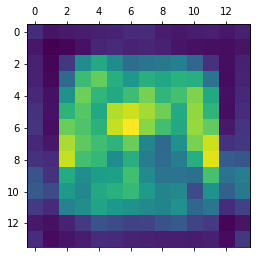

In [53]:
from keras import backend as K

dent_output = model_p.output[:, 643]
last_conv_layer = model_p.get_layer('block5_conv3')

grads = K.gradients(dent_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))

iterate = K.function([model_p.input], [pooled_grads, last_conv_layer.output[0]])

pooled_grads_value, conv_layer_output_value = iterate([c])

for i in range(32):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis =-1)
print(heatmap)

heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)

In [54]:
import cv2
img = cv2.imread(sample_path)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = heatmap * 0.4  + img
cv2.imwrite('/Users/seino/Downloads/test.jpg', superimposed_img)

True

In [57]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions

sample_path ='/Users/seino/Documents/res/09_DeepLearning/img/With_Gingiva/Mix/512/11,12,13,14,15,16,17,21,22,23,24,25,26,27.png'
sample = image.load_img(sample_path, target_size=(32, 32))
c = image.img_to_array(sample)
c = np.expand_dims(c, axis=0)
c = preprocess_input(c)
preds = model.predict(c)
np.argmax(preds[0])
from keras import backend as K

dent_output = model.output[:, 22]
last_conv_layer = model.get_layer('separable_conv2d_10')

grads = K.gradients(dent_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))

iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

pooled_grads_value, conv_layer_output_value = iterate([c])

for i in range(32):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis =-1)
print(heatmap)

heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)

22

In [109]:
import os
image_path ='/Users/seino/Documents/res/09_DeepLearning/img/With_Gingiva/Mix/512/'

fn_list = os.listdir(image_path)
try:
    fn_list.remove('.DS_Store')
except:
    pass

img_fullpath_list =[]
for i in fn_list:
    img_fullpath = os.path.join(image_path, i)
    img_fullpath_list.append(img_fullpath)


In [113]:
#How many images do you want?
img_num = 100


for k in range(img_num):
    sample_image = image.load_img(img_fullpath_list[k], target_size=(32,32))
    sample_image = image.img_to_array(sample_image)
    sample_image = np.expand_dims(sample_image, axis=0)
    sample_image = preprocess_input(sample_image)
    preds = model.predict(sample_image)
    preds_num = np.argmax(preds[0])
    
    output_dent = model.output[:, preds_num]
    layer_name = 'separable_conv2d_10'
    conv_layer_last = model.get_layer(layer_name)

    grads = K.gradients(output_dent, conv_layer_last.output)[0]
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    iterate = K.function([model.input], [pooled_grads, conv_layer_last.output[0]])
    pooled_grads_value, conv_layer_output_value = iterate([sample_image])

    for i in range(32):
        conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
        heatmap = np.mean(conv_layer_output_value, axis =-1)
        heatmap = np.maximum(heatmap, 0)
        heatmap /= np.max(heatmap)

    img = cv2.imread(img_fullpath_list[k])
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = heatmap * 0.4  + img
    cv2.imwrite('/Users/seino/Downloads/heatmap/' + str(layer_name) + '/with_gingiva/' + str(fn_list[k]) + '_heatmap.jpg', superimposed_img)